In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-laplace-fd)

We make a crude discretization for illustrative purposes.

In [2]:
m, n = 6, 5
x, Dx, Dxx = FNC.diffmat2(m, [0, 3])
y, Dy, Dyy = FNC.diffmat2(n, [-1, 1])
mtx, X, Y, unvec, is_boundary = FNC.tensorgrid(x, y)

(FNCFunctions.var"#mtx#93"{Vector{Float64}, Vector{Float64}}([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], [-1.0, -0.6, -0.19999999999999996, 0.20000000000000018, 0.6000000000000001, 1.0]), [0.0 0.0 … 0.0 0.0; 0.5 0.5 … 0.5 0.5; … ; 2.5 2.5 … 2.5 2.5; 3.0 3.0 … 3.0 3.0], [-1.0 -0.6 … 0.6000000000000001 1.0; -1.0 -0.6 … 0.6000000000000001 1.0; … ; -1.0 -0.6 … 0.6000000000000001 1.0; -1.0 -0.6 … 0.6000000000000001 1.0], FNCFunctions.var"#unvec#92"{Int64, Int64}(5, 6), Bool[1 1 … 1 1; 1 0 … 0 1; … ; 1 0 … 0 1; 1 1 … 1 1])

Next, we evaluate $\phi$ on the grid to get the forcing vector of the linear system.

In [3]:
ϕ = (x, y) -> x^2 - y + 2
b = vec(mtx(ϕ));

Here are the coefficients for the PDE collocation, before any modifications are made for the boundary conditions. The combination of Kronecker products and finite differences produces a characteristic sparsity pattern.

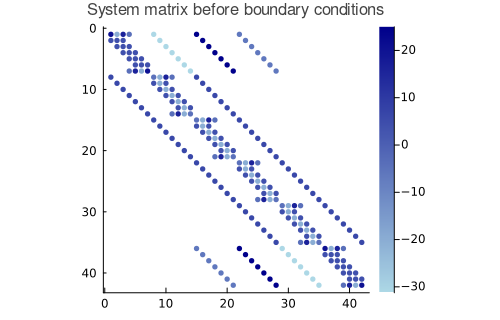

In [4]:
using SparseArrays
A = kron(I(n+1), sparse(Dxx)) + kron(sparse(Dyy), I(m+1))
spy(A;
    color=:blues,  m=3,
    title="System matrix before boundary conditions")

The number of equations is equal to $(m+1)(n+1)$, which is the total number of points on the grid.

In [5]:
N = length(b)

42

The combination of Kronecker products and finite differences produces a characteristic sparsity pattern.

We now use the Boolean array that indicates where the boundary points lie in the grid.

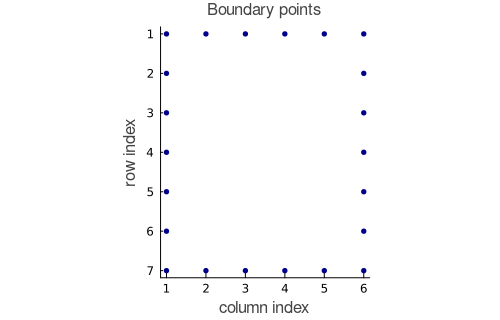

In [6]:
spy(sparse(is_boundary);
    m=3,  color=:darkblue, 
    legend=:none,  title="Boundary points",
    xaxis=("column index", [0, n+2]), 
    yaxis=("row index", [0, m+2]))

In order to impose Dirichlet boundary conditions, we replace the boundary rows of the system by rows of the identity.

In [7]:
I_N = I(N)
idx = vec(is_boundary)
A[idx, :] .= I_N[idx, :];     # Dirichlet conditions

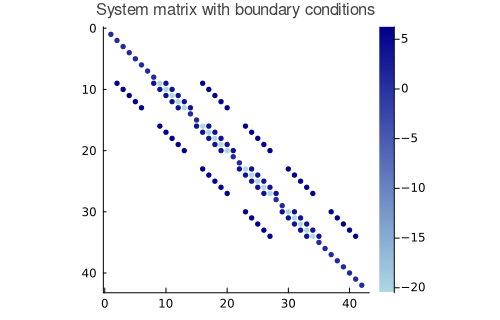

In [8]:
spy(A;
    color=:blues,  m=3,
    title="System matrix with boundary conditions")

Finally, we must replace the rows in the vector $\mathbf{b}$ by the boundary values being assigned to the boundary points. Here, we let the boundary values be zero everywhere.

In [9]:
b[idx] .= 0;                 # Dirichlet values

Now we can solve for $\mathbf{u}$ and reinterpret it as the matrix-shaped $\mathbf{U}$, the solution on our grid.

In [10]:
u = A \ b
U = unvec(u)

7×6 Matrix{Float64}:
 0.0   0.0        0.0        0.0        0.0       0.0
 0.0  -0.549304  -0.758277  -0.712098  -0.453391  0.0
 0.0  -0.917873  -1.30273   -1.24377   -0.798473  0.0
 0.0  -1.21928   -1.74064   -1.67911   -1.09539   0.0
 0.0  -1.39869   -1.97682   -1.91786   -1.27929   0.0
 0.0  -1.21024   -1.65843   -1.61225   -1.11433   0.0
 0.0   0.0        0.0        0.0        0.0       0.0